# Temporal Series

Project repository for the time series course at the cin ufpe postgraduate course


# Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error

2022-12-22 12:46:03.589129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 12:46:04.004158: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-22 12:46:04.793852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-22 12:46:04.793930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

# Exploring Data

In [3]:
generation_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_1_Weather_Sensor_Data.csv')
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
generation_data

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2            0.000    6987759.0  
3            0.000    7602960.0  
4            0.000    7158964.0  
...            ...          ...  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0  

[68778 rows x 7 columns]

In [5]:
weather_data

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1     2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2     2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3     2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4     2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                   ...       ...              ...                  ...   
3177  2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe            22.150570   
3178  2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe            22.129816   
3179  2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe            22.008275   
3180  2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe            21.969495   
3181  2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe            21.909288   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1              22.761668          0.0  
2              22.592306          0.0  
3              22.360852          0.0  
4              22.165423          0.0  
...                  ...          ...  
3177           21.480377          0.0  
3178           21.389024          0.0  
3179           20.709211          0.0  
3180           20.734963          0.0  
3181           20.427972          0.0  

[3182 rows x 6 columns]

## Data time changing, merging and checking for null data

In [3]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data["DATE_TIME"])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data["DATE_TIME"])

df = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df.isnull().sum()
#%%

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

## Plotting correlations

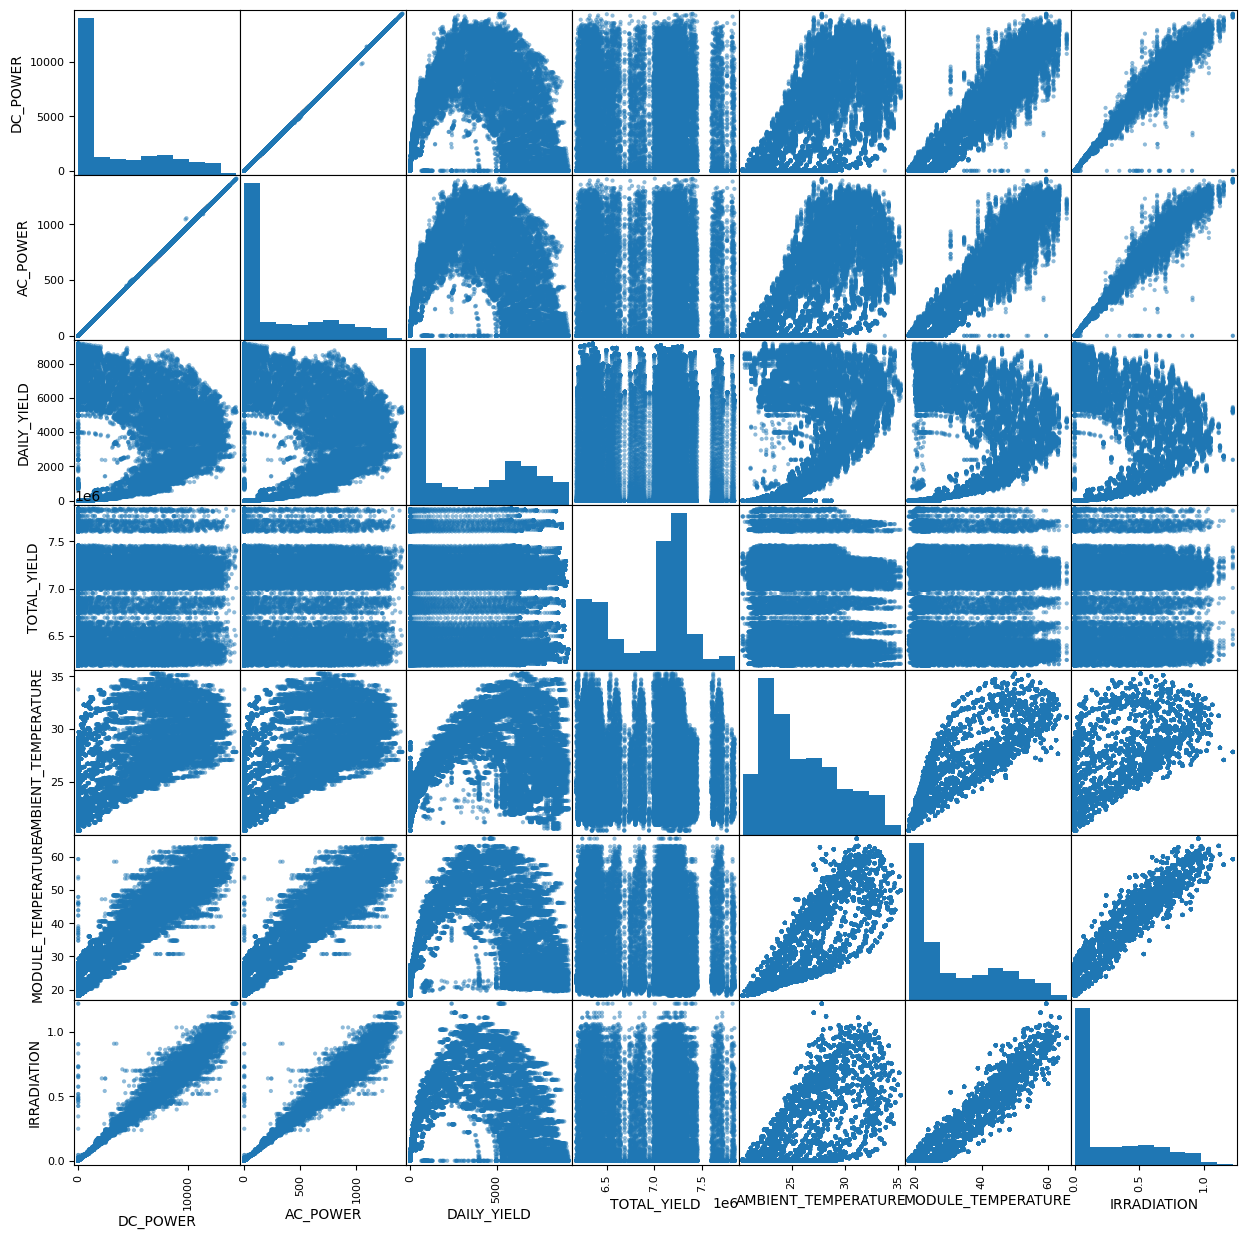

In [4]:
pd.plotting.scatter_matrix(df, figsize=(15,15))

plt.show()

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

With that, we can see that irradiation and module_temperature are very correlate to the AC power generated. These will be the two main components for prediction. But is still important to use the ambient temperature in some of the experiments because it is the easier data to get in any solar power forecasting. So for this work we will try to predict AC power using ambient temperature and irradiation

## Some data analysis

In [6]:
encoder = LabelEncoder()
df['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df['SOURCE_KEY'])
print(df['SOURCE_KEY_NUMBER'].nunique())

22


Is important to notice that in this dataset we have 22 individual solar panels.

### Analyzing the behavior of one of the painels

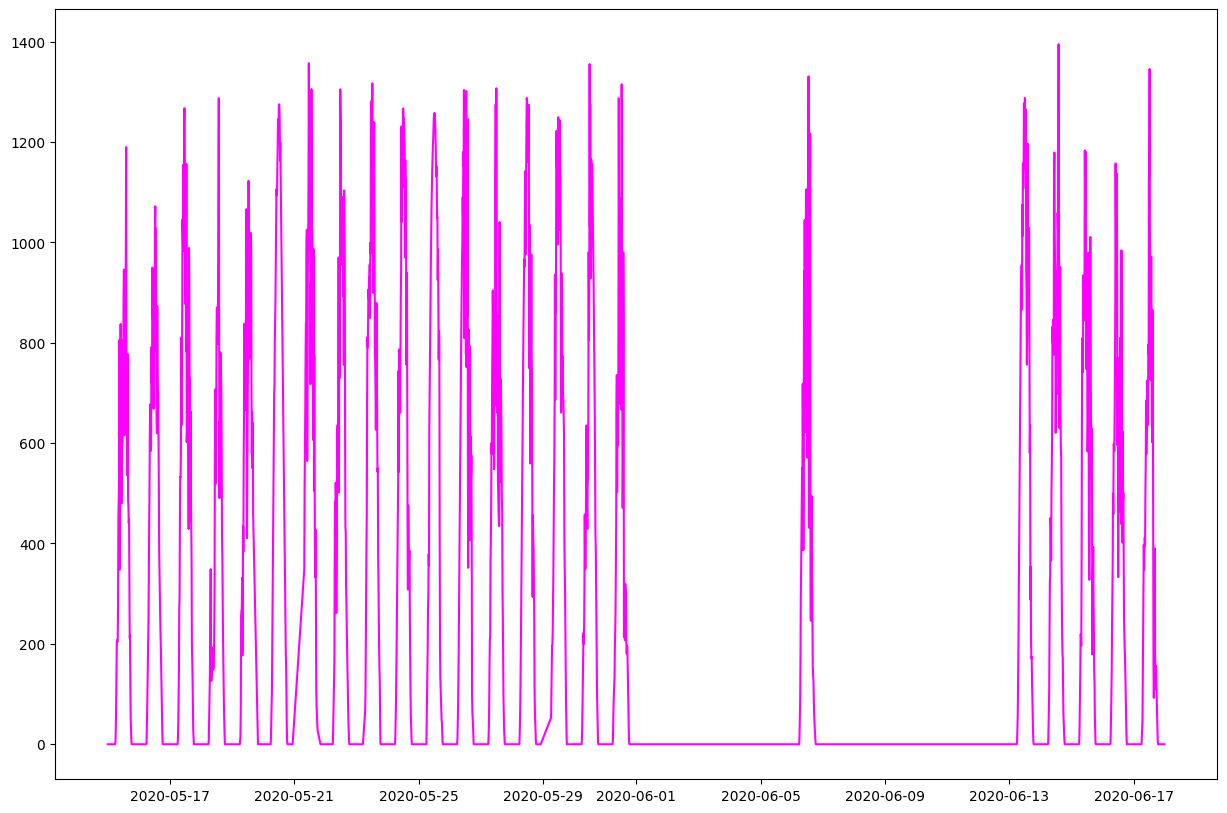

In [7]:
colors = ['olive', 'crimson', 'maroon', 'fuchsia']
df1 = df.loc[df['SOURCE_KEY_NUMBER'] == 1]
df1 = df1.reset_index()

plt.figure(figsize=(15,10))
plt.plot( df1['DATE_TIME'],df1['AC_POWER'],color =colors[3],linestyle = 'solid')
plt.show()


The interval without data occurs on account of this command df = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME', executed early

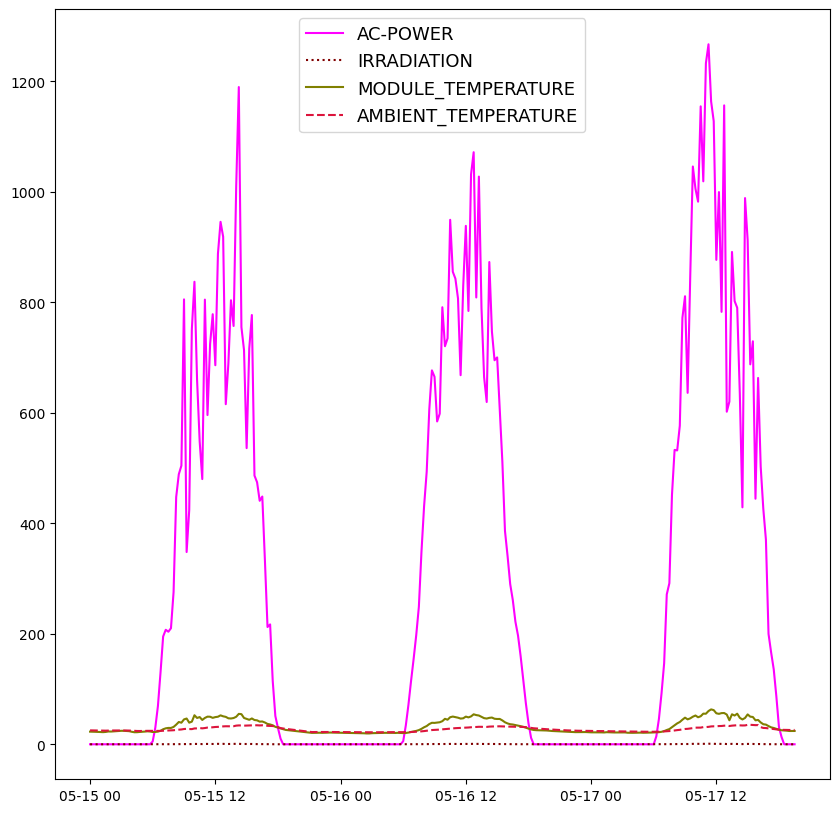

In [8]:
plt.figure(figsize=(10,10))
plt.plot( df1['DATE_TIME'][0:250],df1['AC_POWER'][0:250],color =colors[3],linestyle = '-')
plt.plot( df1['DATE_TIME'][0:250],df1['IRRADIATION'][0:250],color =colors[2],linestyle = ':')
plt.plot( df1['DATE_TIME'][0:250],df1['MODULE_TEMPERATURE'][0:250],color =colors[0],linestyle = '-')
plt.plot( df1['DATE_TIME'][0:250],df1['AMBIENT_TEMPERATURE'][0:250],color =colors[1],linestyle = '--')
plt.legend(('AC-POWER',
           'IRRADIATION',
           'MODULE_TEMPERATURE',
           'AMBIENT_TEMPERATURE'),fontsize=13)
plt.show()


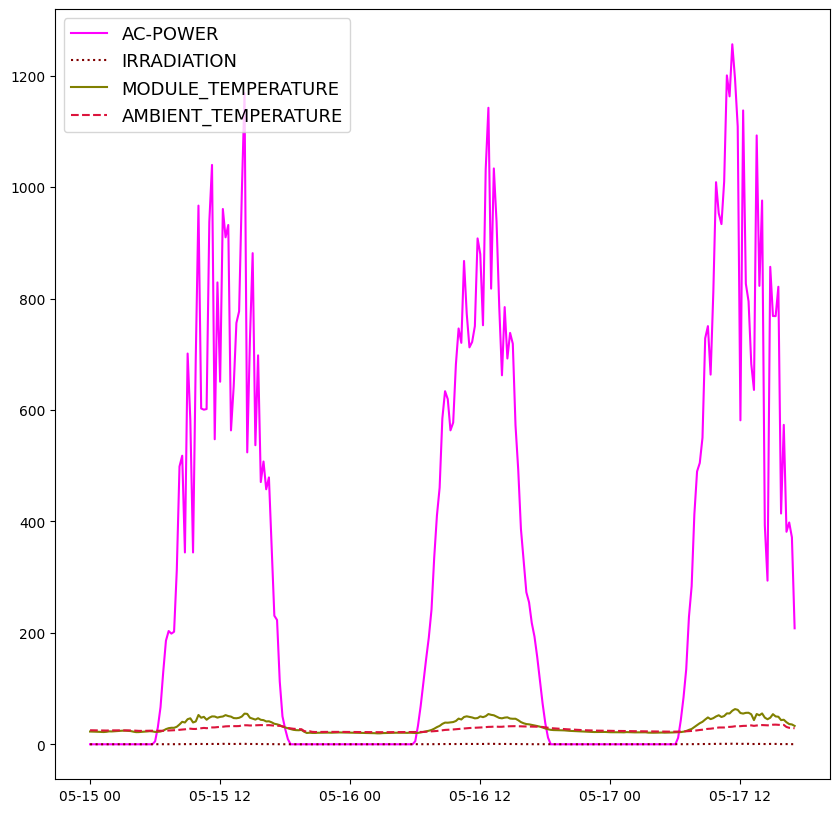

In [9]:
df1 = df.loc[df['SOURCE_KEY_NUMBER'] == 19]
df1 = df1.reset_index()

plt.figure(figsize=(10,10))
plt.plot( df1['DATE_TIME'][0:250],df1['AC_POWER'][0:250],color =colors[3],linestyle = '-')
plt.plot( df1['DATE_TIME'][0:250],df1['IRRADIATION'][0:250],color =colors[2],linestyle = ':')
plt.plot( df1['DATE_TIME'][0:250],df1['MODULE_TEMPERATURE'][0:250],color =colors[0],linestyle = '-')
plt.plot( df1['DATE_TIME'][0:250],df1['AMBIENT_TEMPERATURE'][0:250],color =colors[1],linestyle = '--')
plt.legend(('AC-POWER',
           'IRRADIATION',
           'MODULE_TEMPERATURE',
           'AMBIENT_TEMPERATURE'),fontsize=13)
plt.show()

The scale of the data is very different, lets normalize it and use only the variables we will work on.

In [10]:
mean_irradiation = df['IRRADIATION'].mean()
std_irradiation = df['IRRADIATION'].std()
mean_ac = df['AC_POWER'].mean()
std_ac = df['AC_POWER'].std()  
mean_temp = df['AMBIENT_TEMPERATURE'].mean()
std_temp = df['AMBIENT_TEMPERATURE'].std()  
df['AC_POWER']=(df['AC_POWER']-df['AC_POWER'].mean())/df['AC_POWER'].std()
df['IRRADIATION']=(df['IRRADIATION']-df['IRRADIATION'].mean())/df['IRRADIATION'].std()
df['AMBIENT_TEMPERATURE']=(df['AMBIENT_TEMPERATURE']-df['AMBIENT_TEMPERATURE'].mean())/df['AMBIENT_TEMPERATURE'].std()

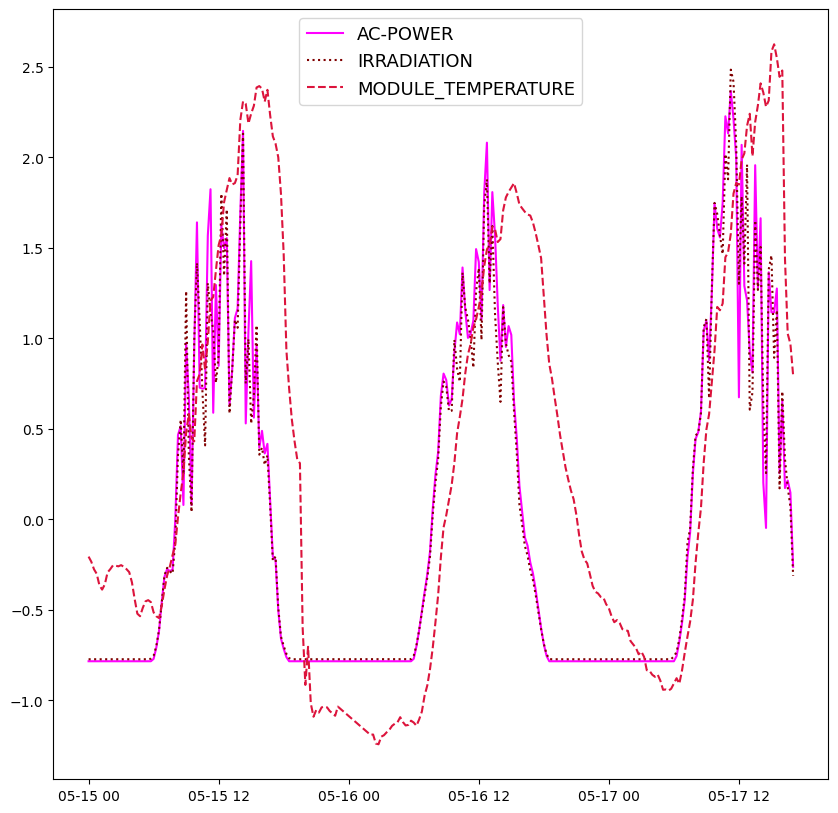

In [11]:
df1 = df.loc[df['SOURCE_KEY_NUMBER'] == 19]
df1 = df1.reset_index()

plt.figure(figsize=(10,10))
plt.plot( df1['DATE_TIME'][0:250],df1['AC_POWER'][0:250],color =colors[3],linestyle = '-')
plt.plot( df1['DATE_TIME'][0:250],df1['IRRADIATION'][0:250],color =colors[2],linestyle = ':')
plt.plot( df1['DATE_TIME'][0:250],df1['AMBIENT_TEMPERATURE'][0:250],color =colors[1],linestyle = '--')
plt.legend(('AC-POWER',
           'IRRADIATION',
           'MODULE_TEMPERATURE',
           'AMBIENT_TEMPERATURE'),fontsize=13)
plt.show()

Every solar panel have similar data, but with natural distiction.

In [12]:
len(df1)

2075

We have 2075 diffent points, so we can divide later the dataset into 

# Experiment with IRRADIATION 15 min pred

## Preper data for training

In [13]:
#Function to split one variable time series sequences
def split_sequence(sequence_x1, sequence_y, n_steps):
    X, y = list(), list()

    for i in range(len(sequence_x1)):
		# find the end of this pattern
        end_ix = i + n_steps
		# check if we are beyond the sequence
        if end_ix > len(sequence_x1)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence_x1[i:end_ix], sequence_y[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#Function to create series
def creates_series(series_x1, series_y, n_steps,split_size):
    X1 = series_x1.values
    Y = series_y.values
    train_x1, test_x1 = X1[0:split_size], X1[split_size:]
    train_y, test_y = Y[0:split_size], Y[split_size:]
    X_train, y_train = split_sequence(train_x1,train_y, n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    y_train = y_train.reshape((y_train.shape[0], 1))
    return X_train, y_train, train_x1 ,test_x1, train_y, test_y

def make_dataset(df, tag_x, tag_y,num_painels, n_steps, split_size):
    for i in range (num_painels):
        df1 = df.loc[df['SOURCE_KEY_NUMBER'] == i]
        df1 = df1.reset_index()
        X = df1[tag_x]
        y = df1[tag_y]
        X_train1, y_train1, train_x1 ,test_x1, train_y, test_y = creates_series(X,y ,n_steps,split_size)
        if i == 0:
            X_train = X_train1
            y_train =  y_train1
        else:
            X_train = np.concatenate((X_train,X_train1))
            y_train = np.concatenate((y_train,y_train1))
    return X_train, y_train

Creating training dataset

In [14]:
tag_x = 'IRRADIATION'
tag_y = 'AC_POWER'
num_painels = df['SOURCE_KEY_NUMBER'].nunique()
n_steps = 2
split_size = 1500
n_features = 1
X_train, y_train = make_dataset(df, tag_x, tag_y, num_painels, n_steps, split_size)
len(X_train)

32956

MLP model

In [15]:
model_mlp = Sequential()
model_mlp.add(Dense(1024, activation='relu', input_shape=(n_steps, 1)))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mae', optimizer='adam')
model_mlp.fit(X_train, y_train, epochs=15)

2022-12-21 19:17:30.643335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 19:17:30.724465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 19:17:30.724597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 19:17:30.725562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/15
1030/1030 [==============================] - 4s 2ms/step - loss: 0.1917
Epoch 2/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1829
Epoch 3/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1827
Epoch 4/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1820
Epoch 5/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1819
Epoch 6/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1810
Epoch 7/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1799
Epoch 8/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1796
Epoch 9/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1804
Epoch 10/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1799
Epoch 11/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1789
Epoch 12/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1784
E

Stacked LSTM model

In [16]:
model_sLSTM = Sequential()
model_sLSTM.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_sLSTM.add(LSTM(50, activation='relu'))
model_sLSTM.add(Dense(1))
model_sLSTM.compile(optimizer='adam', loss='mse')
model_sLSTM.fit(X_train, y_train, epochs=15)

Epoch 1/15
1030/1030 [==============================] - 7s 6ms/step - loss: 0.1367
Epoch 2/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0834
Epoch 3/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0829
Epoch 4/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0826
Epoch 5/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0825
Epoch 6/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0822
Epoch 7/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0821
Epoch 8/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0818
Epoch 9/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0823
Epoch 10/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0821
Epoch 11/15
1030/1030 [==============================] - 7s 6ms/step - loss: 0.0815
Epoch 12/15
1030/1030 [==============================] - 7s 7ms/step - loss: 0.0816
E

Bidirecional LSTM model

In [17]:
model_bLSTM = Sequential()
model_bLSTM.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_bLSTM.add(Dense(1))
model_bLSTM.compile(optimizer='adam', loss='mse')
model_bLSTM.fit(X_train, y_train, epochs=15)

Epoch 1/15
1030/1030 [==============================] - 7s 6ms/step - loss: 0.1216
Epoch 2/15
1030/1030 [==============================] - 6s 5ms/step - loss: 0.0830
Epoch 3/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0826
Epoch 4/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0823
Epoch 5/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0823
Epoch 6/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0821
Epoch 7/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0819
Epoch 8/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0820
Epoch 9/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0815
Epoch 10/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0816
Epoch 11/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0813
Epoch 12/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.0810
E

## Test

Function for test and plot

In [18]:
def error_and_plot(model,train_x,test_x,test_y,n_steps,n_features, split_size):
    history = []
    for i in range(n_steps):
        history.append(array(train_x[(split_size-n_steps)+i]))
    predictions = []
    for t in range(len(test_x)):
        input_vec = np.zeros([n_steps,1])
        for i in range (n_steps):
            input_vec[i] = history[i]
        
        input_vec = input_vec.reshape((1,n_steps,n_features))
        yhat = model.predict(input_vec, verbose = 0)
        predictions.append(yhat[0][0])
        history.append(test_x[t])
        history = history[-n_steps:]
        
    rmse = sqrt(mean_squared_error(test_y, predictions))
    mape = mean_absolute_percentage_error(test_y, predictions)
    print('Test RMSE: %.3f' % rmse)
    print('Test MAPE: %.3f' % mape)
    # plot forecasts against actual outcomes
    plt.figure(figsize=(7,7))
    plt.plot(test_y,)
    plt.plot(predictions, color='red', linestyle = '--')

    plt.legend(('Real Value',
           'Prediction',
                ),fontsize=13)
    pyplot.show()

### Testing on same power plant dataset

In [19]:
df1 = df.loc[df['SOURCE_KEY_NUMBER'] == 1]
df1 = df1.reset_index()
n_features = 1
y1 = df1['AC_POWER']
X1 = df1['IRRADIATION']
X_train1, y_train1, train_x1 ,test_x1, train_y1, test_y1 = creates_series(X1,y1 ,n_steps,1500)

MLP

Test RMSE: 0.383
Test MAPE: 0.676


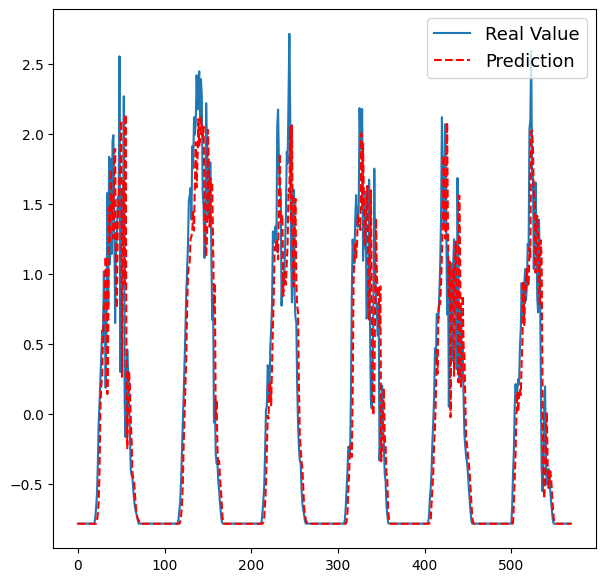

In [20]:
error_and_plot(model_mlp,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Stacked LSTM

Test RMSE: 0.289
Test MAPE: 0.428


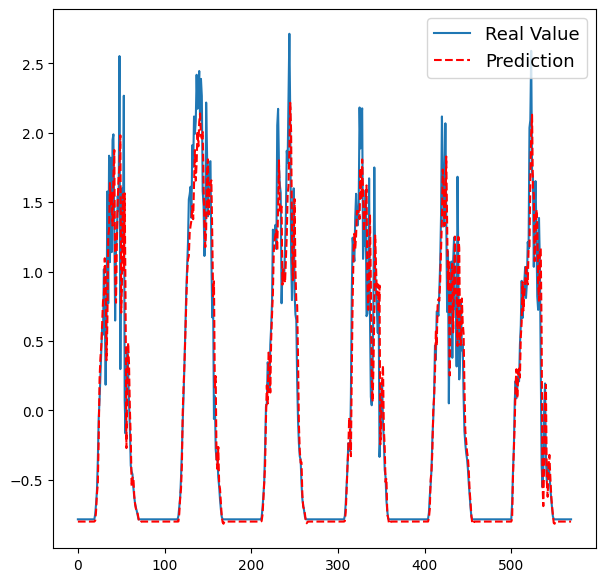

In [21]:
error_and_plot(model_sLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Bidirectional LSTM

Test RMSE: 0.290
Test MAPE: 0.430


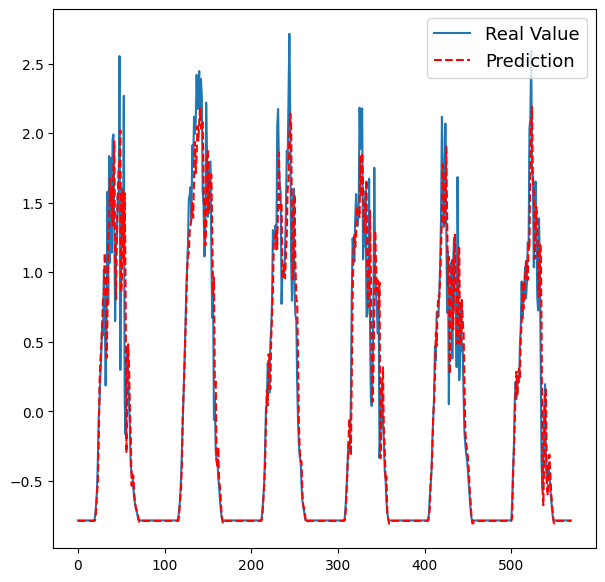

In [22]:
error_and_plot(model_bLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

### Testing for other power plant

In [23]:
generation_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_2_Weather_Sensor_Data.csv')
df_2 = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
encoder = LabelEncoder()
df_2['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_2['SOURCE_KEY'])
df_2['AC_POWER']=(df_2['AC_POWER']-mean_ac)/std_ac
df_2['IRRADIATION']=(df_2['IRRADIATION']-mean_irradiation)/std_irradiation


In [24]:
df1 = df_2.loc[df_2['SOURCE_KEY_NUMBER'] == 2]
df1 = df1.reset_index()
n_features = 1
y1 = df1['AC_POWER']
X1 = df1['IRRADIATION']
X_train1, y_train1, train_x1 ,test_x1, train_y1, test_y1 = creates_series(X1,y1 ,n_steps,1500)

MLP

Test RMSE: 0.750
Test MAPE: 1.754


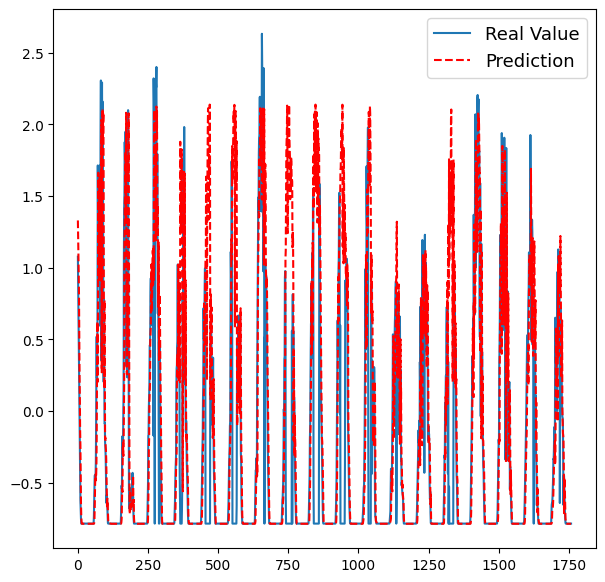

In [25]:
error_and_plot(model_mlp,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Stacked LSTM

Test RMSE: 0.717
Test MAPE: 1.527


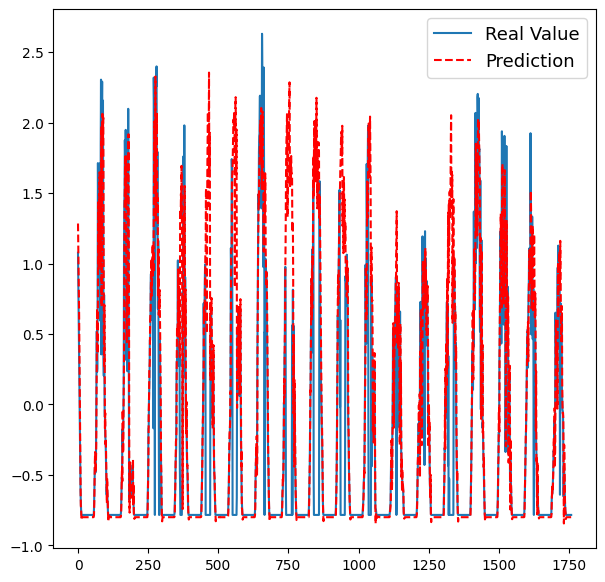

In [26]:
error_and_plot(model_sLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Bidirectional LSTM

Test RMSE: 0.729
Test MAPE: 1.552


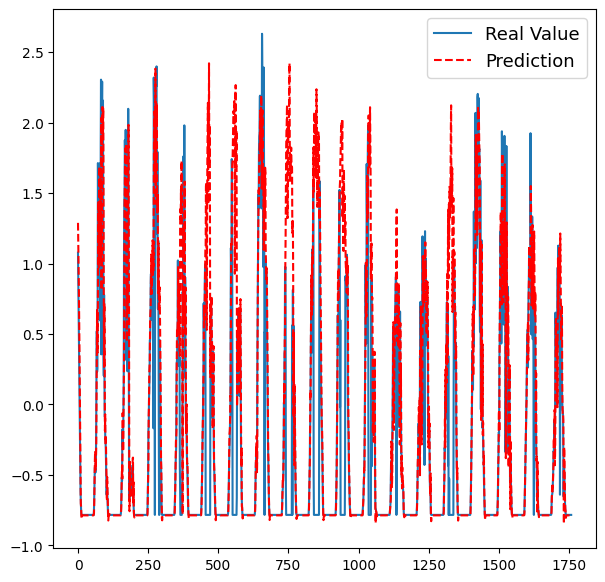

In [27]:
error_and_plot(model_bLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

# Experiment with AMBIENT_TEMPETURE 15 min pred

## Training

In [28]:
tag_x = 'AMBIENT_TEMPERATURE'
X_train, y_train = make_dataset(df, tag_x, tag_y, num_painels, n_steps, split_size)
len(X_train)

32956

MLP model

In [29]:
model_mlp = Sequential()
model_mlp.add(Dense(1024, activation='relu', input_shape=(n_steps, 1)))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mae', optimizer='adam')
model_mlp.fit(X_train, y_train, epochs=15)

Epoch 1/15
1030/1030 [==============================] - 3s 2ms/step - loss: 0.5594
Epoch 2/15
1030/1030 [==============================] - 3s 3ms/step - loss: 0.5458
Epoch 3/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.5446
Epoch 4/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.5442
Epoch 5/15
1030/1030 [==============================] - 3s 3ms/step - loss: 0.5437
Epoch 6/15
1030/1030 [==============================] - 3s 3ms/step - loss: 0.5428
Epoch 7/15
1030/1030 [==============================] - 3s 2ms/step - loss: 0.5430
Epoch 8/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.5418
Epoch 9/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.5408
Epoch 10/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.5416
Epoch 11/15
1030/1030 [==============================] - 2s 2ms/step - loss: 0.5406
Epoch 12/15
1030/1030 [==============================] - 3s 2ms/step - loss: 0.5403
E

Stacked LSTM model

In [30]:
model_sLSTM = Sequential()
model_sLSTM.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_sLSTM.add(LSTM(50, activation='relu'))
model_sLSTM.add(Dense(1))
model_sLSTM.compile(optimizer='adam', loss='mse')
model_sLSTM.fit(X_train, y_train, epochs=15)

Epoch 1/15
1030/1030 [==============================] - 8s 6ms/step - loss: 0.5378
Epoch 2/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.3402
Epoch 3/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2919
Epoch 4/15
1030/1030 [==============================] - 7s 7ms/step - loss: 0.2798
Epoch 5/15
1030/1030 [==============================] - 7s 6ms/step - loss: 0.2731
Epoch 6/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2655
Epoch 7/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2571
Epoch 8/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2512
Epoch 9/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2479
Epoch 10/15
1030/1030 [==============================] - 7s 7ms/step - loss: 0.2468
Epoch 11/15
1030/1030 [==============================] - 7s 7ms/step - loss: 0.2413
Epoch 12/15
1030/1030 [==============================] - 7s 7ms/step - loss: 0.2415
E

Bidirecional LSTM model

In [31]:
model_bLSTM = Sequential()
model_bLSTM.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_bLSTM.add(Dense(1))
model_bLSTM.compile(optimizer='adam', loss='mse')
model_bLSTM.fit(X_train, y_train, epochs=15)

Epoch 1/15
1030/1030 [==============================] - 8s 6ms/step - loss: 0.5401
Epoch 2/15
1030/1030 [==============================] - 7s 7ms/step - loss: 0.3979
Epoch 3/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.3765
Epoch 4/15
1030/1030 [==============================] - 6s 5ms/step - loss: 0.3528
Epoch 5/15
1030/1030 [==============================] - 6s 5ms/step - loss: 0.3286
Epoch 6/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.3099
Epoch 7/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2976
Epoch 8/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2886
Epoch 9/15
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2869
Epoch 10/15
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2818
Epoch 11/15
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2803
Epoch 12/15
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2783
E

## Test

### Testing on same power plant dataset

In [32]:
df1 = df.loc[df['SOURCE_KEY_NUMBER'] == 1]
df1 = df1.reset_index()
n_features = 1
y1 = df1['AC_POWER']
X1 = df1['AMBIENT_TEMPERATURE']
X_train1, y_train1, train_x1 ,test_x1, train_y1, test_y1 = creates_series(X1,y1 ,n_steps,1500)

MLP

Test RMSE: 0.893
Test MAPE: 1.121


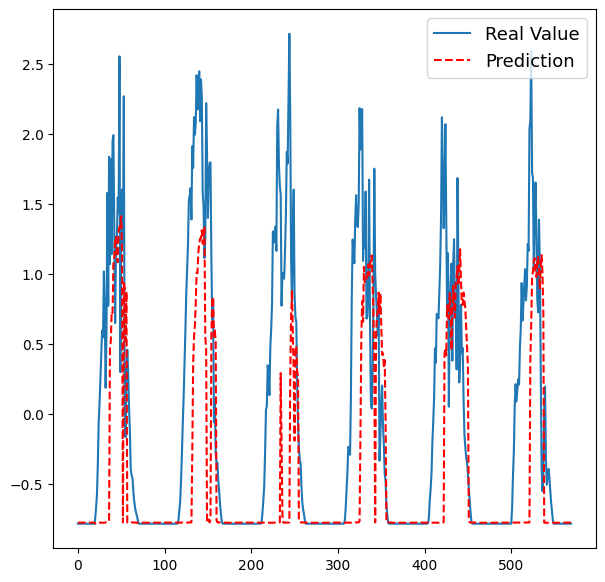

In [33]:
error_and_plot(model_mlp,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Stacked LSTM

Test RMSE: 0.662
Test MAPE: 0.816


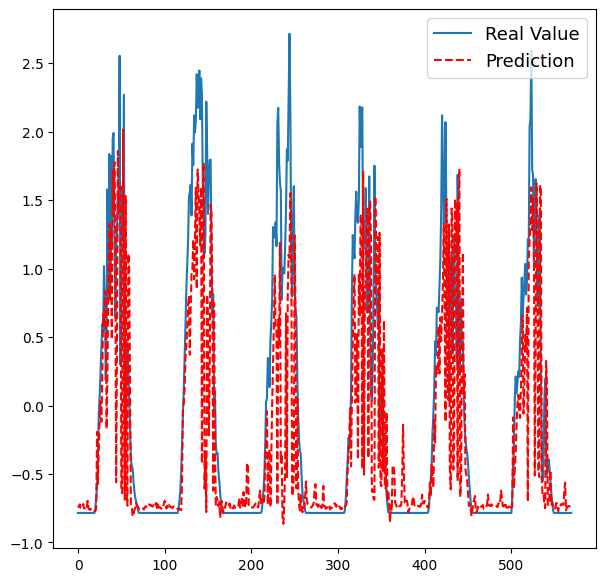

In [34]:
error_and_plot(model_sLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Bidirectional LSTM

Test RMSE: 0.731
Test MAPE: 0.823


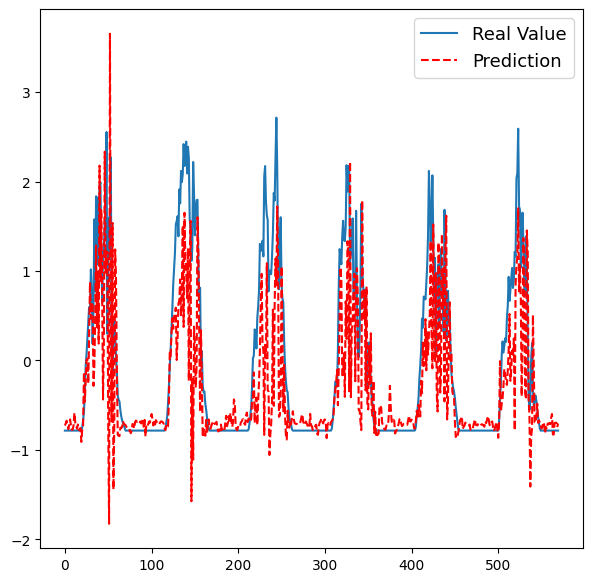

In [35]:
error_and_plot(model_bLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

### Testing for other power plant

In [36]:
generation_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_2_Weather_Sensor_Data.csv')
df_2 = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
encoder = LabelEncoder()
df_2['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_2['SOURCE_KEY'])
df_2['AC_POWER']=(df_2['AC_POWER']-mean_ac)/std_ac
df_2['AMBIENT_TEMPERATURE']=(df_2['AMBIENT_TEMPERATURE']-mean_temp)/std_temp


In [37]:
df1 = df_2.loc[df_2['SOURCE_KEY_NUMBER'] == 2]
df1 = df1.reset_index()
n_features = 1
y1 = df1['AC_POWER']
X1 = df1['AMBIENT_TEMPERATURE']
X_train1, y_train1, train_x1 ,test_x1, train_y1, test_y1 = creates_series(X1,y1 ,n_steps,1500)

MLP

Test RMSE: 0.913
Test MAPE: 3.619


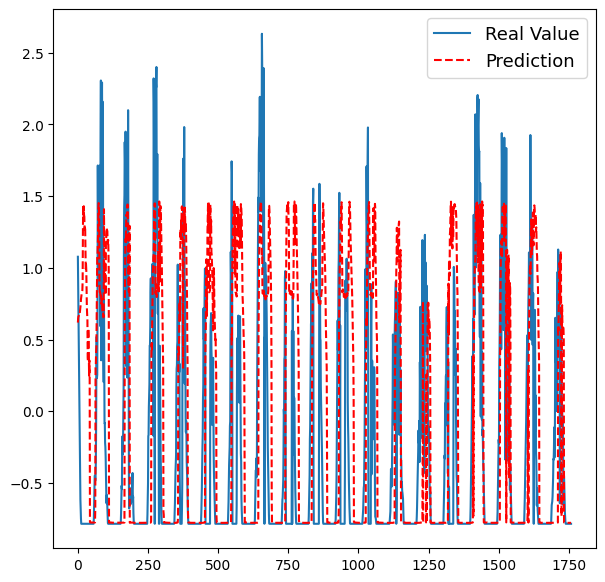

In [38]:
error_and_plot(model_mlp,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Stacked LSTM

Test RMSE: 0.787
Test MAPE: 1.494


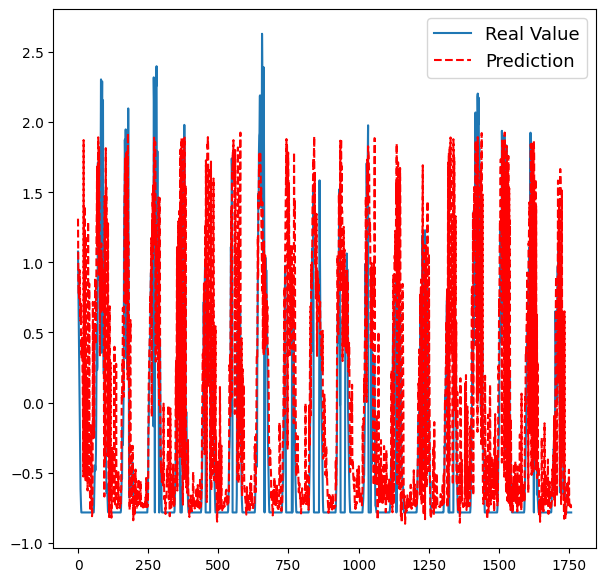

In [39]:
error_and_plot(model_sLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Bidirectional LSTM

Test RMSE: 0.772
Test MAPE: 1.548


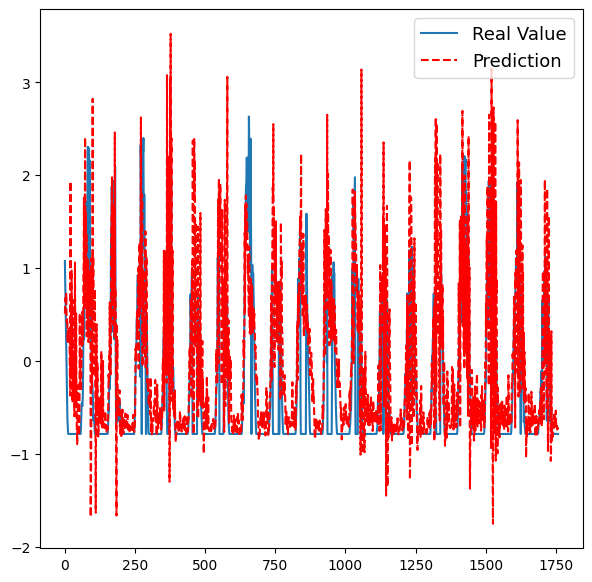

In [40]:
error_and_plot(model_bLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

# Experiment with IRRADIANCE 1h pred

## Training

In [41]:
def make_dataset_1h(df, tag_x, tag_y,num_painels, n_steps, split_size):
    for i in range (num_painels):
        df1 = df.loc[df['SOURCE_KEY_NUMBER'] == i]
        df1 = df1.reset_index()
        df1 = df1.iloc[::4]
        df1 = df1.reset_index()
        X = df1[tag_x]
        y = df1[tag_y]
        X_train1, y_train1, train_x1 ,test_x1, train_y, test_y = creates_series(X,y ,n_steps,split_size)
        if i == 0:
            X_train = X_train1
            y_train =  y_train1
        else:
            X_train = np.concatenate((X_train,X_train1))
            y_train = np.concatenate((y_train,y_train1))
    return X_train, y_train

In [42]:
tag_x = 'IRRADIATION'
n_steps = 2
split_size = 375
X_train, y_train = make_dataset_1h(df, tag_x, tag_y, num_painels, n_steps, split_size)
len(X_train)

8206

MLP model

In [43]:
model_mlp = Sequential()
model_mlp.add(Dense(1024, activation='relu', input_shape=(n_steps, 1)))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mae', optimizer='adam')
model_mlp.fit(X_train, y_train, epochs=15)

Epoch 1/15
257/257 [==============================] - 1s 2ms/step - loss: 0.4133
Epoch 2/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3933
Epoch 3/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3950
Epoch 4/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3937
Epoch 5/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3910
Epoch 6/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3910
Epoch 7/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3899
Epoch 8/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3911
Epoch 9/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3899
Epoch 10/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3900
Epoch 11/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3901
Epoch 12/15
257/257 [==============================] - 1s 2ms/step - loss: 0.3907
Epoch 13/15
257/257 [====

Stacked LSTM model

In [44]:
model_sLSTM = Sequential()
model_sLSTM.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_sLSTM.add(LSTM(50, activation='relu'))
model_sLSTM.add(Dense(1))
model_sLSTM.compile(optimizer='adam', loss='mse')
model_sLSTM.fit(X_train, y_train, epochs=15)

Epoch 1/15
257/257 [==============================] - 3s 6ms/step - loss: 0.4154
Epoch 2/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2053
Epoch 3/15
257/257 [==============================] - 2s 7ms/step - loss: 0.1992
Epoch 4/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1948
Epoch 5/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1931
Epoch 6/15
257/257 [==============================] - 2s 7ms/step - loss: 0.1903
Epoch 7/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1883
Epoch 8/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1876
Epoch 9/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1868
Epoch 10/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1863
Epoch 11/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1853
Epoch 12/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1850
Epoch 13/15
257/257 [====

Bidirecional LSTM model

In [45]:
model_bLSTM = Sequential()
model_bLSTM.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_bLSTM.add(Dense(1))
model_bLSTM.compile(optimizer='adam', loss='mse')
model_bLSTM.fit(X_train, y_train, epochs=15)

Epoch 1/15
257/257 [==============================] - 3s 6ms/step - loss: 0.4014
Epoch 2/15
257/257 [==============================] - 1s 6ms/step - loss: 0.2070
Epoch 3/15
257/257 [==============================] - 1s 5ms/step - loss: 0.1931
Epoch 4/15
257/257 [==============================] - 1s 6ms/step - loss: 0.1901
Epoch 5/15
257/257 [==============================] - 1s 5ms/step - loss: 0.1893
Epoch 6/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1880
Epoch 7/15
257/257 [==============================] - 1s 5ms/step - loss: 0.1873
Epoch 8/15
257/257 [==============================] - 1s 6ms/step - loss: 0.1855
Epoch 9/15
257/257 [==============================] - 1s 6ms/step - loss: 0.1852
Epoch 10/15
257/257 [==============================] - 2s 6ms/step - loss: 0.1843
Epoch 11/15
257/257 [==============================] - 1s 6ms/step - loss: 0.1836
Epoch 12/15
257/257 [==============================] - 1s 5ms/step - loss: 0.1828
Epoch 13/15
257/257 [====

## Test

### Testing on same power plant dataset

In [46]:
df1 = df.loc[df['SOURCE_KEY_NUMBER'] == 1]
df1 = df1.reset_index()
df1 = df1.iloc[::4]
df1 = df1.reset_index()
n_features = 1
y1 = df1['AC_POWER']
X1 = df1['IRRADIATION']
X_train1, y_train1, train_x1 ,test_x1, train_y1, test_y1 = creates_series(X1,y1 ,n_steps,split_size)

MLP

Test RMSE: 0.708
Test MAPE: 1.159


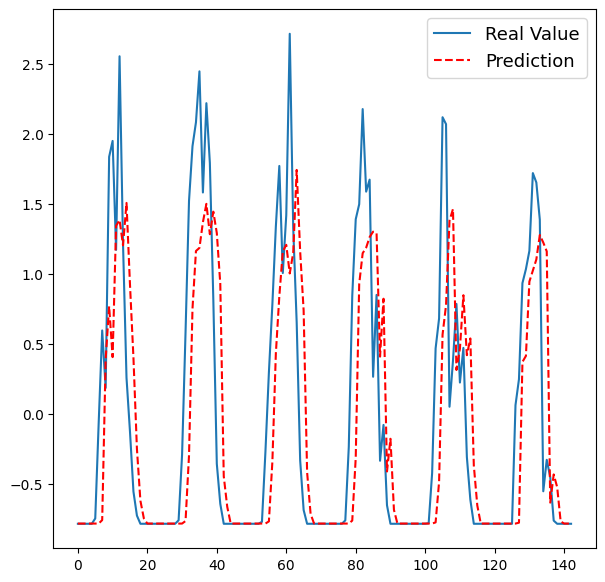

In [47]:
error_and_plot(model_mlp,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Stacked LSTM

Test RMSE: 0.501
Test MAPE: 0.915


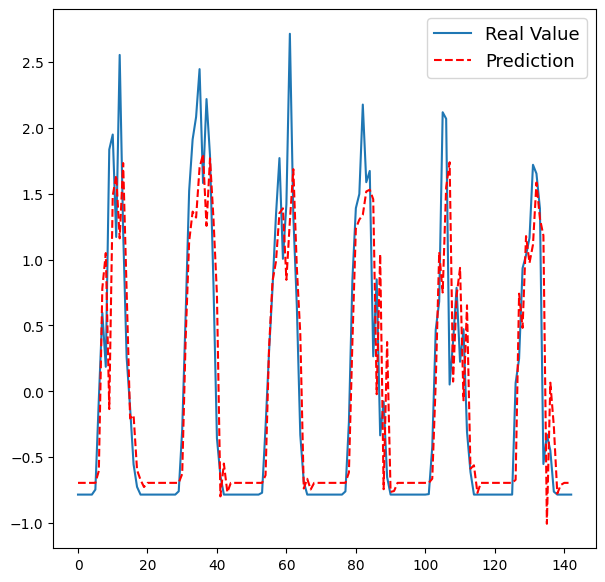

In [48]:
error_and_plot(model_sLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Bidirectional LSTM

Test RMSE: 0.508
Test MAPE: 0.863


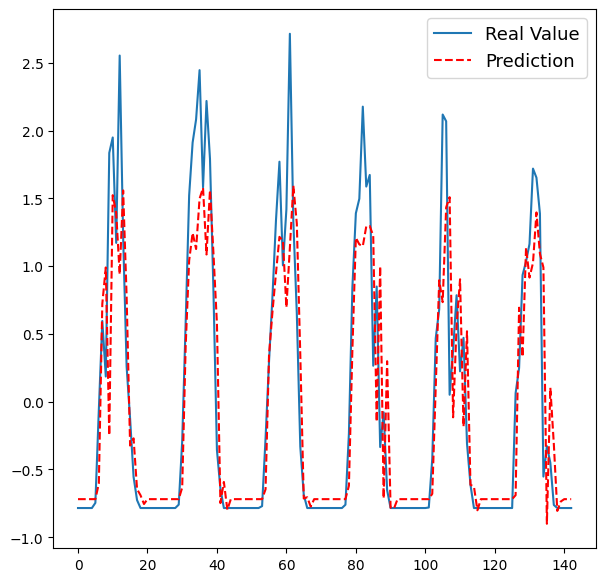

In [49]:
error_and_plot(model_bLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

### Testing for other power plant

In [50]:
generation_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_2_Weather_Sensor_Data.csv')
df_2 = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
encoder = LabelEncoder()
df_2['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_2['SOURCE_KEY'])
df_2['AC_POWER']=(df_2['AC_POWER']-mean_ac)/std_ac
df_2['IRRADIATION']=(df_2['IRRADIATION']-mean_irradiation)/std_irradiation


In [51]:
df1 = df_2.loc[df_2['SOURCE_KEY_NUMBER'] == 1]
df1 = df1.reset_index()
df1 = df1.iloc[::4]
df1 = df1.reset_index()
n_features = 1
y1 = df1['AC_POWER']
X1 = df1['IRRADIATION']
X_train1, y_train1, train_x1 ,test_x1, train_y1, test_y1 = creates_series(X1,y1 ,n_steps,split_size)

MLP

Test RMSE: 0.737
Test MAPE: 24.130


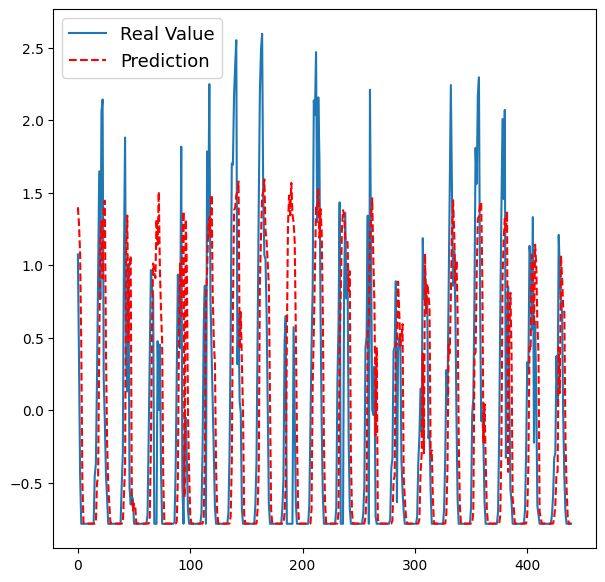

In [52]:
error_and_plot(model_mlp,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Stacked LSTM

Test RMSE: 0.584
Test MAPE: 13.258


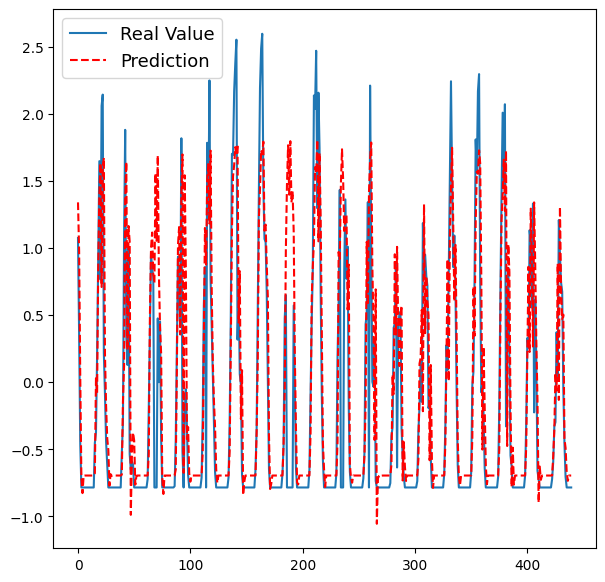

In [53]:
error_and_plot(model_sLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Bidirectional LSTM

Test RMSE: 0.560
Test MAPE: 13.347


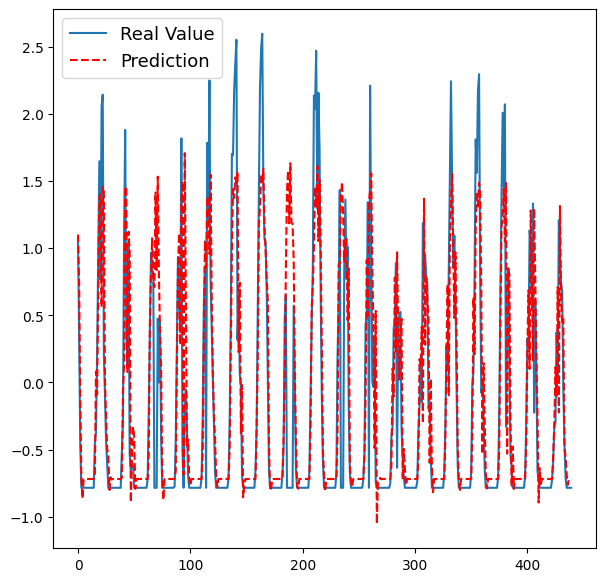

In [54]:
error_and_plot(model_bLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

# Experiment with AMBIENT_TEMPERATURE 1h pred

## Training

In [55]:
tag_x = 'AMBIENT_TEMPERATURE'
n_steps = 2
split_size = 375
X_train, y_train = make_dataset_1h(df, tag_x, tag_y, num_painels, n_steps, split_size)
len(X_train)

8206

MLP

In [56]:
model_mlp = Sequential()
model_mlp.add(Dense(1024, activation='relu', input_shape=(n_steps, 1)))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mae', optimizer='adam')
model_mlp.fit(X_train, y_train, epochs=15)

Epoch 1/15
257/257 [==============================] - 1s 2ms/step - loss: 0.7247
Epoch 2/15
257/257 [==============================] - 1s 2ms/step - loss: 0.7024
Epoch 3/15
257/257 [==============================] - 1s 2ms/step - loss: 0.6980
Epoch 4/15
257/257 [==============================] - 1s 2ms/step - loss: 0.6952
Epoch 5/15
257/257 [==============================] - 1s 3ms/step - loss: 0.6940
Epoch 6/15
257/257 [==============================] - 1s 2ms/step - loss: 0.6947
Epoch 7/15
257/257 [==============================] - 1s 2ms/step - loss: 0.6951
Epoch 8/15
257/257 [==============================] - 1s 2ms/step - loss: 0.6926
Epoch 9/15
257/257 [==============================] - 1s 2ms/step - loss: 0.6928
Epoch 10/15
257/257 [==============================] - 1s 3ms/step - loss: 0.6928
Epoch 11/15
257/257 [==============================] - 1s 3ms/step - loss: 0.6919
Epoch 12/15
257/257 [==============================] - 1s 2ms/step - loss: 0.6927
Epoch 13/15
257/257 [====

Stacked LSTM model

In [59]:
model_sLSTM = Sequential()
model_sLSTM.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_sLSTM.add(LSTM(50, activation='relu'))
model_sLSTM.add(Dense(1))
model_sLSTM.compile(optimizer='adam', loss='mse')
model_sLSTM.fit(X_train, y_train, epochs=15)

Epoch 1/15
257/257 [==============================] - 3s 6ms/step - loss: 0.7247
Epoch 2/15
257/257 [==============================] - 2s 7ms/step - loss: 0.3384
Epoch 3/15
257/257 [==============================] - 2s 7ms/step - loss: 0.2753
Epoch 4/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2607
Epoch 5/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2519
Epoch 6/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2492
Epoch 7/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2446
Epoch 8/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2433
Epoch 9/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2373
Epoch 10/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2337
Epoch 11/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2335
Epoch 12/15
257/257 [==============================] - 2s 6ms/step - loss: 0.2317
Epoch 13/15
257/257 [====

Bidirecional LSTM model

In [60]:
model_bLSTM = Sequential()
model_bLSTM.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_bLSTM.add(Dense(1))
model_bLSTM.compile(optimizer='adam', loss='mse')
model_bLSTM.fit(X_train, y_train, epochs=15)

Epoch 1/15
257/257 [==============================] - 3s 5ms/step - loss: 0.7414
Epoch 2/15
257/257 [==============================] - 1s 5ms/step - loss: 0.3625
Epoch 3/15
257/257 [==============================] - 1s 5ms/step - loss: 0.3030
Epoch 4/15
257/257 [==============================] - 1s 6ms/step - loss: 0.2716
Epoch 5/15
257/257 [==============================] - 1s 6ms/step - loss: 0.2593
Epoch 6/15
257/257 [==============================] - 1s 6ms/step - loss: 0.2536
Epoch 7/15
257/257 [==============================] - 1s 6ms/step - loss: 0.2506
Epoch 8/15
257/257 [==============================] - 1s 5ms/step - loss: 0.2504
Epoch 9/15
257/257 [==============================] - 1s 5ms/step - loss: 0.2478
Epoch 10/15
257/257 [==============================] - 1s 5ms/step - loss: 0.2458
Epoch 11/15
257/257 [==============================] - 1s 5ms/step - loss: 0.2450
Epoch 12/15
257/257 [==============================] - 1s 5ms/step - loss: 0.2446
Epoch 13/15
257/257 [====

## Test

### Testing on same power plant dataset

In [61]:
df1 = df.loc[df['SOURCE_KEY_NUMBER'] == 1]
df1 = df1.reset_index()
df1 = df1.iloc[::4]
df1 = df1.reset_index()
n_features = 1
y1 = df1['AC_POWER']
X1 = df1['AMBIENT_TEMPERATURE']
X_train1, y_train1, train_x1 ,test_x1, train_y1, test_y1 = creates_series(X1,y1 ,n_steps,split_size)

MLP

Test RMSE: 1.115
Test MAPE: 1.106


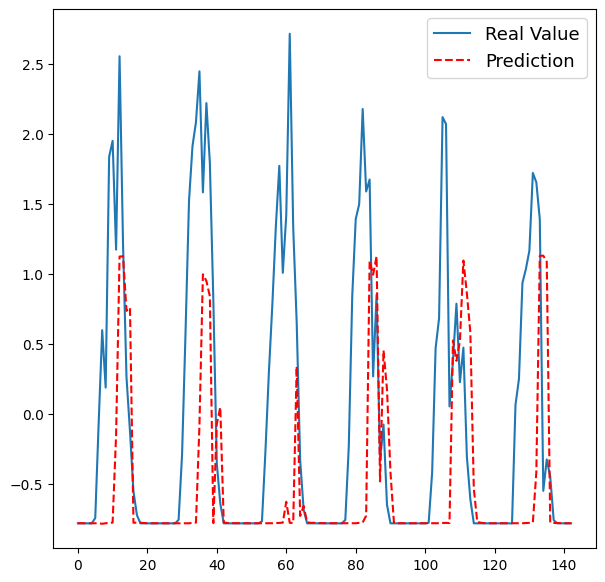

In [62]:
error_and_plot(model_mlp,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Stacked LSTM

Test RMSE: 0.677
Test MAPE: 0.996


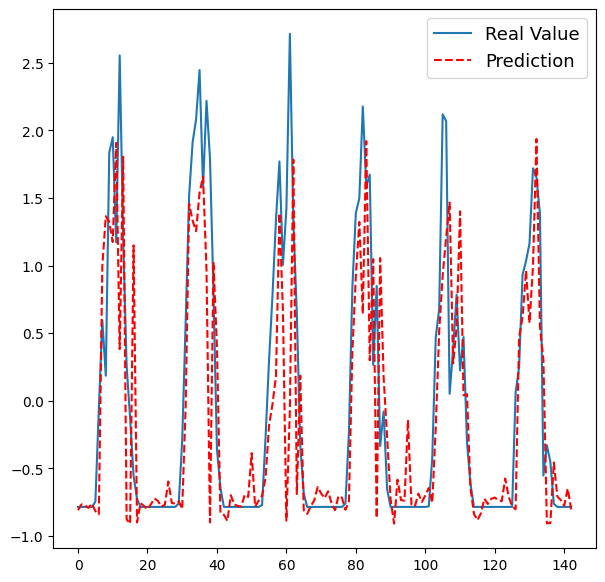

In [63]:
error_and_plot(model_sLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Bidirectional LSTM

Test RMSE: 0.687
Test MAPE: 0.970


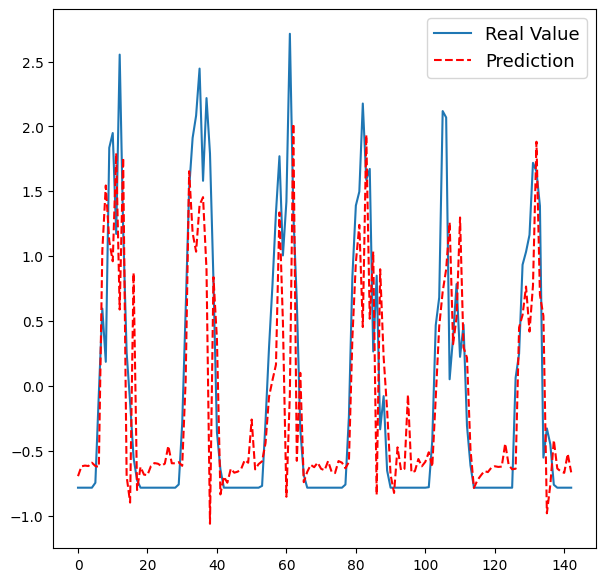

In [64]:
error_and_plot(model_bLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

### Testing for other power plant

In [66]:
generation_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('/home/pauloguedes/series-temporais/datasets/kaggle/Plant_2_Weather_Sensor_Data.csv')
df_2 = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
encoder = LabelEncoder()
df_2['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_2['SOURCE_KEY'])
df_2['AC_POWER']=(df_2['AC_POWER']-mean_ac)/std_ac
df_2['AMBIENT_TEMPERATURE']=(df_2['AMBIENT_TEMPERATURE']-mean_temp)/std_temp


In [67]:
df1 = df_2.loc[df_2['SOURCE_KEY_NUMBER'] == 1]
df1 = df1.reset_index()
df1 = df1.iloc[::4]
df1 = df1.reset_index()
n_features = 1
y1 = df1['AC_POWER']
X1 = df1['AMBIENT_TEMPERATURE']
X_train1, y_train1, train_x1 ,test_x1, train_y1, test_y1 = creates_series(X1,y1 ,n_steps,split_size)

MLP

Test RMSE: 0.944
Test MAPE: 5.009


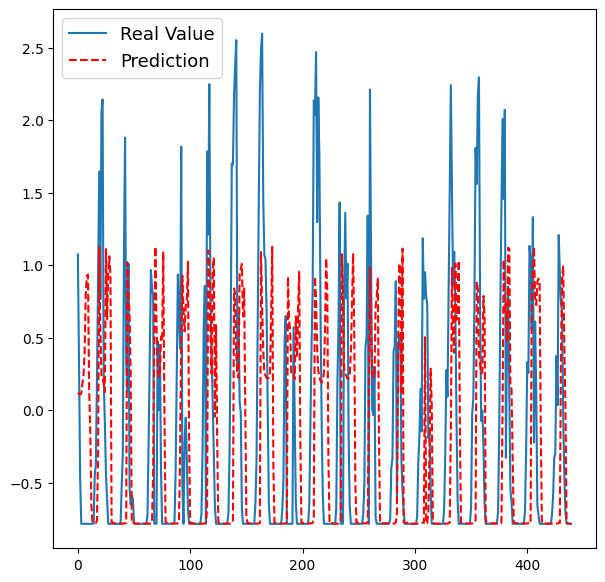

In [68]:
error_and_plot(model_mlp,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Stacked LSTM

Test RMSE: 0.722
Test MAPE: 7.706


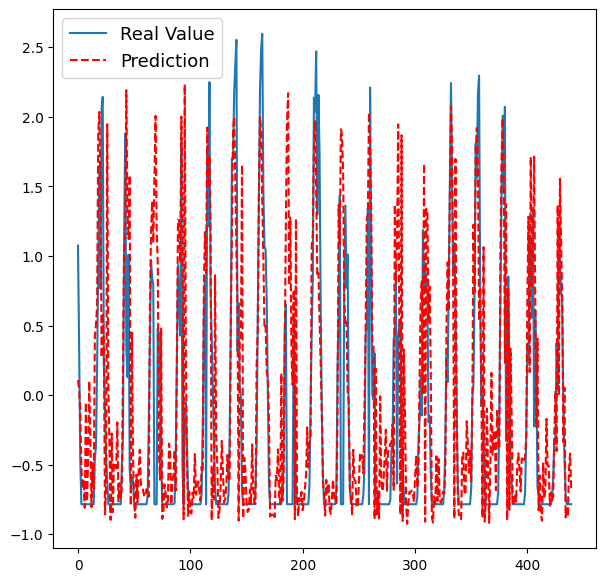

In [69]:
error_and_plot(model_sLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

Bidirectional LSTM

Test RMSE: 0.727
Test MAPE: 5.786


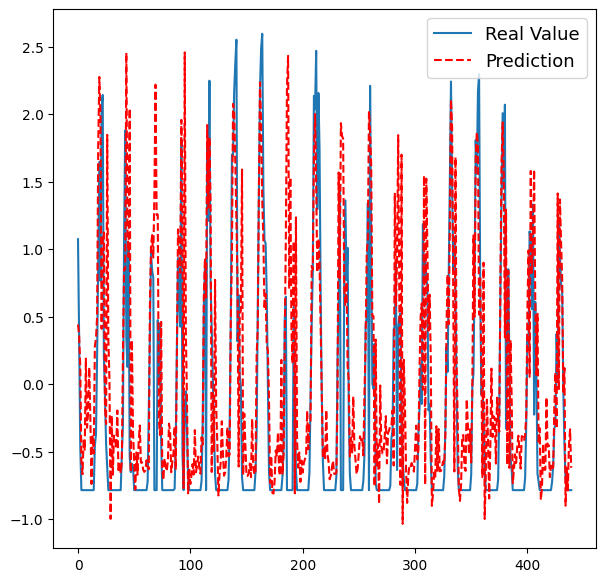

In [70]:
error_and_plot(model_bLSTM,train_x1,test_x1,test_y1,n_steps,n_features, split_size)

# Results exploration

Results can differ a little bit in different runs

## 15 min pred

|                    | Irradiation same power plant | Irradiation differ power plant | Ambient temp same power plant | Ambient tempdiffer power plant |
|--------------------|------------------------------|--------------------------------|-------------------------------|--------------------------------|
| MLP                | RMSE = 0.383 MAPE = 0.676    | RMSE = 0.750 MAPE = 1.754      | RMSE = 0.893 MAPE = 1.121     | RMSE = 0.913 MAPE = 3.619      |
| Stacked LSTM       | RMSE = 0.289 MAPE = 0.428    | RMSE = 0.717 MAPE = 1.527      | RMSE = 0.662 MAPE = 0.816     | RMSE = 0.787 MAPE = 1.494      |
| Bidirectional LSTM | RMSE = 0.290 MAPE = 0.430    | RMSE = 0.729 MAPE = 1.552      | RMSE = 0.731 MAPE = 0.823     | RMSE = 0.772 MAPE = 1.548      |

## 1h pred

|                    | Irradiation same power plant | Irradiation differ power plant | Ambient temp same power plant | Ambient tempdiffer power plant |
|--------------------|------------------------------|--------------------------------|-------------------------------|--------------------------------|
| MLP                | RMSE = 0.708 MAPE = 1.159    | RMSE = 0.737 MAPE = 24.130     | RMSE = 1.115 MAPE = 1.106     | RMSE = 0.944 MAPE = 5.009      |
| Stacked LSTM       | RMSE = 0.5019 MAPE = 0.915   | RMSE = 0.584 MAPE = 13.258     | RMSE = 0.677 MAPE = 0.996     | RMSE = 0.722 MAPE = 7.706      |
| Bidirectional LSTM | RMSE = 0.508 MAPE = 0.863    | RMSE = 0.560 MAPE = 13.347     | RMSE = 0.687 MAPE = 0.970     | RMSE = 0.727 MAPE = 5.786      |